# <center>**Research on Leveraged Assets**</center>

Consider an asset $S$ whose price dynamics in the real-world probability space are described by the following law of motion:
$$ \frac{dS_t}{S_t} = \mu_t dt + \sigma_t dB_t, $$
where $S_t$ is the price of asset $S$ at time $t$, $\mu_t$ is the drift at $t$, $\sigma_t$ is the instantaneous volatility at $t$, and $B_t$ is a standard Brownian Motion at $t$. 

Now, consider a leveraged asset $L$ with asset $S$ as underlying, and leverage $l$. In practice, leveraged assets are constructed such that their relative returns are targeted to be multiples of underlying's returns, by rebalancing positions in futures in specified time intervals, and/or when the actual leverage moves out of a specified range. Here, we assume that rebalancing takes place on continuous basis, and there are no transaction costs. Then, price dynamics of $L$ are described by the following law of motion:
$$ \frac{dL_t}{L_t} = l \frac{dS_t}{S_t} = l \mu_t dt + l \sigma_t dB_t \Rightarrow dL_t = l \mu_t L_t dt + l \sigma_t L_t dB_t, $$
where $L_t$ is the price of $L$ at time $t$. The solution to the above SDE is the following:
$$ L_t = L_0 e^{\int_0^t \left( l \mu_s - \frac{1}{2} \left( l \sigma_s \right)^2 \right) ds + l \int_0^t \sigma_s dB_s} = L_0 e^{ l \left[ \int_0^t \left( \mu_s - \frac{1}{2} \sigma_s^2 - \frac{1}{2} (l - 1) \sigma_s^2 \right) ds + \int_0^t \sigma_s dB_s \right]} = L_0 \left[ e^{ \int_0^t \left( \mu_s - \frac{1}{2} \sigma_s^2 \right) ds + \int_0^t \sigma_s dB_s} \right]^l e^{ - \frac{1}{2} l (l - 1) \int_0^t \sigma_s^2 ds }$$

Note that $ e^{ \int_0^t \left( \mu_s - \frac{1}{2} \sigma_s^2 \right) ds + \int_0^t \sigma_s dB_s} $ is the gross return of the underlying asset at $t$. Thus, the gross return on the leveraged asset is the gross return on the underlying to the power of leverage ($l$), diminished by the volatility drag factor $ \left( e^{ - \frac{1}{2} l (l - 1) \int_0^t \sigma_s^2 ds } \right) $.

The condition for the leveraged asset to yield a positive return at $t$ is then:
$$ \frac{L_t}{L_0} \gt 1 \iff e^{ l \left[ \int_0^t \left( \mu_s - \frac{1}{2} \sigma_s^2 \right) ds + \int_0^t \sigma_s dB_s \right] - l \left[ \frac{1}{2} (l - 1) \int_0^t \sigma_s^2 ds \right] } \gt 1 $$
$$ \int_0^t \left( \mu_s - \frac{1}{2} \sigma_s^2 \right) ds + \int_0^t \sigma_s dB_s > \frac{1}{2} (l - 1) \int_0^t \sigma_s^2 ds $$

Taking expectations:
$$ E \left[ \int_0^t \mu_s ds \right] \gt \frac{1}{2} l E \left[\int_0^t \sigma_s^2 ds \right] $$

For the most trivial case, i.e., $ \forall_{s \in [0,t]} \mu_s = \mu, \sigma_s = \sigma $, we have:
$$ \mu \gt \frac{1}{2} l \sigma^2 $$

The condition for the leveraged asset to outperform underlying over $[0,t]$:
$$ e^{ l \left[ \int_0^t \left( \mu_s - \frac{1}{2} \sigma_s^2 \right) ds + \int_0^t \sigma_s dB_s \right] - l \left[ \frac{1}{2} (l - 1) \int_0^t \sigma_s^2 ds \right] } \gt e^{ \int_0^t \left( \mu_s - \frac{1}{2} \sigma_s^2 \right) ds + \int_0^t \sigma_s dB_s} $$
$$ (l - 1) \left[ \int_0^t \left( \mu_s - \frac{1}{2} \sigma_s^2 \right) ds + \int_0^t \sigma_s dB_s \right] > l \left[ \frac{1}{2} (l - 1) \int_0^t \sigma_s^2 ds \right] $$
$$ \int_0^t \left( \mu_s - \frac{1}{2} \sigma_s^2 \right) ds + \int_0^t \sigma_s dB_s > \frac{1}{2} l \int_0^t \sigma_s^2 ds $$

Analogously, for the most trivial case:
$$ \mu \gt \frac{1}{2} (l + 1) \sigma^2 $$

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)

### Comparison of price evolution under Heston model

In [19]:
S_0 = 100         # initial stock's price
r = 0.02          # risk-free rate
T = 1.0           # time to maturity (in years)
q = 0             # dividend rate
k = 3.0098        # variance mean-reversion speed
theta = 0.0580    # long-term variance mean
V_0 =  0.0844     # initial variance
sigma = 0.3204    # volatility of the instantaneous variance
rho = -0.2640     # correlation between stock's and variance's Brownian motions

In [20]:
dt = 1. / 252

In [21]:
No = 100000    # number of simulations

In [22]:
U = np.array([np.sqrt(dt) * np.random.normal() for i in range(int(252 * T) - 1)])
W = np.array([np.sqrt(dt) * np.random.normal() for i in range(int(252 * T) - 1)])

In [23]:
dB_S = U                                    # stock's Brownian Motion increments
dB_V = rho * U + np.sqrt(1 - rho**2) * W    # instantaneous variance's Brownian Motion increments

In [24]:
V = np.zeros(int(252 * T))
V[0] = V_0
for i in range(1, int(252 * T)):
  V[i] = V[i-1] + k * (theta - V[i-1]) * dt + sigma * np.sqrt(V[i-1]) * dB_V[i - 1]

In [25]:
S = np.zeros(int(252 * T))
S[0] = S_0
for i in range(1, int(252 * T)):
  S[i] = S[i-1] + (r - q) * S[i-1] * dt + np.sqrt(V[i-1]) * S[i-1] * dB_S[i - 1]

In [26]:
l = 2

In [33]:
S_l = np.zeros(int(252 * T))
S_l[0] = S_0
for i in range(1, int(252 * T)):
  S_l[i] = S_l[i-1] + l * ((r - q) * S_l[i-1] * dt + np.sqrt(V[i-1]) * S_l[i-1] * dB_S[i - 1])

In [43]:
S_l_2 = np.zeros(int(252 * T))
S_l_2[0] = S_0
for i in range(1, int(252 * T)):
  S_l_2[i] = S_0 * (np.exp(np.sum([((r - q) - 0.5 * V[j]) * dt for j in range(i)]) + np.sum([np.sqrt(V[j]) * dB_S[j] for j in range(i)])) ** l) * np.exp(-0.5 * l * (l - 1) * np.sum([V[j] * dt for j in range(i)]))

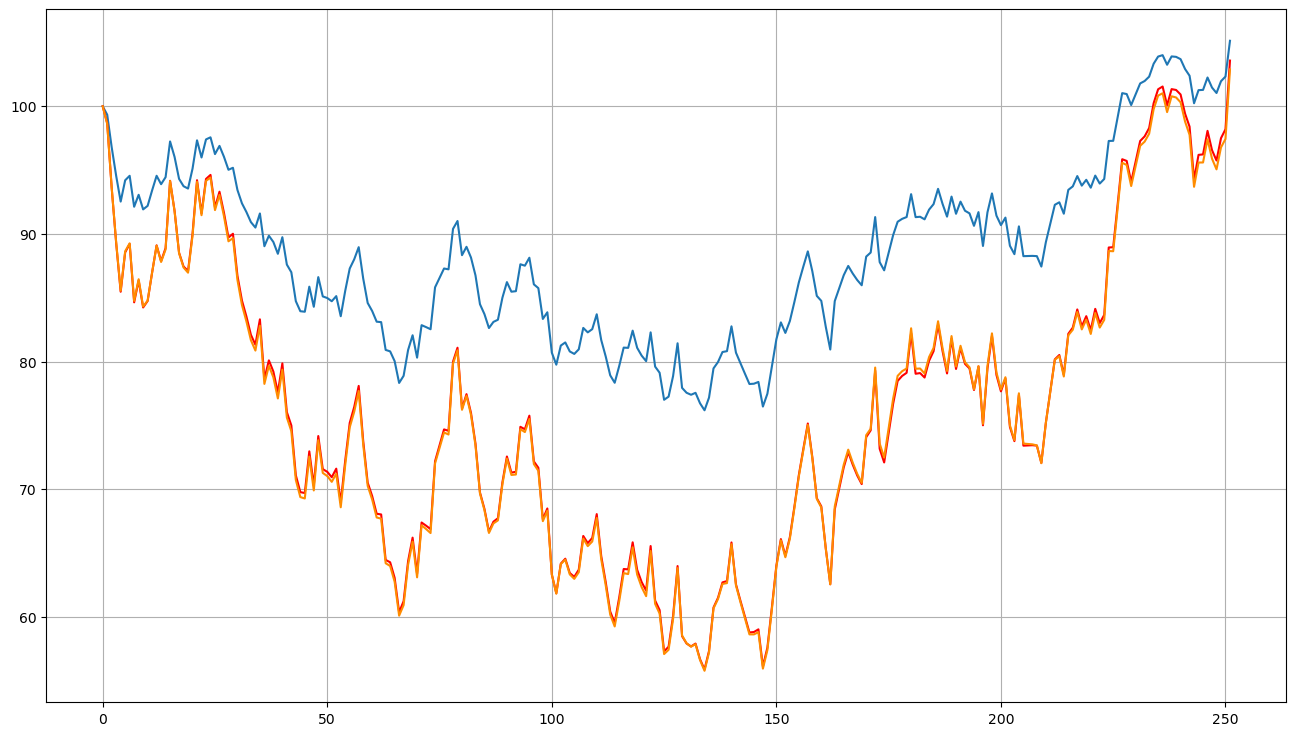

In [44]:
plt.plot(S)
plt.plot(S_l, c = "r")
plt.plot(S_l_2, c = "darkorange")
plt.grid()
plt.show()